# Знакомство с Юпитер ноутбуком

In [ ]:
print('Hello, World!')

Hello, World!


Это текст.  
Это новый текст.

In [ ]:
import numpy as np

In [ ]:
a = 10

In [ ]:
?np.ceil

In [ ]:
!ls

sample_data


In [ ]:
!pip install mendeleev

In [ ]:
from mendeleev import Element

# Задача  
Построить диаграмму рассеяния для стабильных изотопов: протоны vs. нейтроны.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from mendeleev import element, get_all_elements

In [ ]:
element('O').mass_number, element('O').atomic_number

(16, 8)

In [ ]:
for elem in element('O').isotopes:
  print(elem.atomic_number, elem.mass_number, elem.is_radioactive)

8 11 True
8 12 True
8 13 True
8 14 True
8 15 True
8 16 False
8 17 False
8 18 False
8 19 True
8 20 True
8 21 True
8 22 True
8 23 True
8 24 True
8 25 True
8 26 True
8 27 False
8 28 False


In [ ]:
def get_from_mendeleev_table(find_func):
  '''Итерирование по спискам изотопов всех элементов
  Принимает на вход функции'''
  seq = []
  for elem in get_all_elements():
    seq.append(find_func(elem))
    for iso_ in elem.isotopes:
      seq.append(find_func(iso_))
  return seq

def get_p_n(element_):
  'Возвращает количество протонов и нейтронов'
  if not element_.is_radioactive:
    n_protons = element_.atomic_number
    n_neutrons = element_.mass_number - n_protons
    return n_protons, n_neutrons
  else:
    return np.nan, np.nan

In [ ]:
ps_ns = get_from_mendeleev_table(get_p_n)

In [ ]:
type(ps_ns), type(ps_ns[0]), len(ps_ns)

(list, tuple, 3675)

In [ ]:
# 3675,2 -> not nan -> 2, xxx

## 1. Избавление от NaN

In [ ]:
ps_ns_ndarray = np.array(ps_ns)
ps_ns_ndarray.shape

(3675, 2)

In [ ]:
~np.isnan(ps_ns_ndarray).any(axis=1)

array([ True,  True,  True, ..., False, False, False])

In [ ]:
not_nan_indicies = ~np.isnan(ps_ns_ndarray).any(axis=1)
ps_ns_ndarray = ps_ns_ndarray[not_nan_indicies]
ps_ns_ndarray.shape

(418, 2)

## 2. Смена осей (транспонирование)

In [ ]:
ps_ns_ndarray = ps_ns_ndarray.T

In [ ]:
ps_ns_ndarray.shape

(2, 418)

## 3. Визуализация

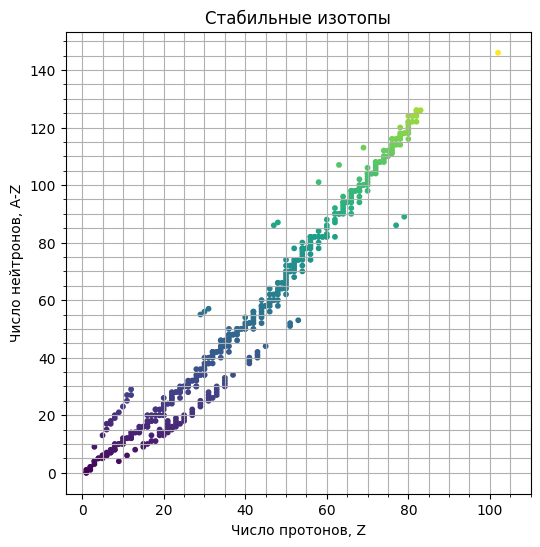

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(ps_ns_ndarray[0], ps_ns_ndarray[1], s=10, c=ps_ns_ndarray[1])
ax.set_xlabel('Число протонов, Z')
ax.set_ylabel('Число нейтронов, A-Z')
ax.set_xticks(np.arange(0, 111, 5), minor=True)
ax.set_yticks(np.arange(0, 151, 5), minor=True)
ax.set_title('Стабильные изотопы')
ax.grid(True, 'both', 'both')
None

In [ ]:
?plt.scatter

In [ ]:
Colormap

NameError: name 'Colormap' is not defined

float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['l